In [103]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

**Reading File**

In [62]:
# Reading File
df = pd.read_csv('/content/ChurnPerdictFinal.xlsx - Sheet1.csv')

**Checking Total No of Columns and Data**

In [63]:
# Checking total no of data and column
df.shape

(13196, 31)

**Showing Data in File**

In [64]:
#showing File data
df.head()

,bussinesID,billing_cycle,country,created_on,last_login,tenure,stores/franchise,no_of_repair_jobs,no_of_customers,total_revenue,amount_receivable,no_of_purchases,use_Paypal,use_Cayan,use_Stripe,use_MailChimp,use_PaypalHere,use_SquareDeep,use_MobileSentrix,use_CustomerPortal,use_PrintNode,use_Square,use_SmsGlobal,use_SmsBroadcast,use_ClickaTell,use_RingCentral,use_Square.1,use_RepairDeskPay,use_FreePBX,use_GoogleCloudPrint,current_bussiness_status
0,c4ca4238a0b923820dcc509a6f75849b,Monthly,United Arab Emirates,7/24/15 17:45,12/16/20 5:09,5,5,593,5465,111802.33,43684.29,0,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,Monthly,United Kingdom,2/27/15 11:32,(NULL),0,1,3,2,198.19,89.10,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
2,d3d9446802a44259755d38e6d163e820,Monthly,United States,2/28/15 1:32,1/4/21 11:02,5,10,567,26,257540.08,121470.29,0,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,True,0
3,6512bd43d9caa6e02c990b0a82652dca,Monthly,United Kingdom,3/2/15 6:01,12/5/17 3:00,2,2,43,38,2485.78,2030.79,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
4,aab3238922bcc25a6f606eb525ffdc56,Monthly,Pakistan,3/3/15 2:28,12/1/15 6:37,0,1,9,2,1370.00,1120.00,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0


**Showing Names of colmns**

In [65]:
# Showing Columns names
df.columns

Index(['bussinesID', 'billing_cycle', 'country', 'created_on', 'last_login',
       'tenure', 'stores/franchise', 'no_of_repair_jobs', 'no_of_customers',
       'total_revenue', 'amount_receivable', 'no_of_purchases', 'use_Paypal',
       'use_Cayan', 'use_Stripe', 'use_MailChimp', 'use_PaypalHere',
       'use_SquareDeep', 'use_MobileSentrix', 'use_CustomerPortal',
       'use_PrintNode', 'use_Square', 'use_SmsGlobal', 'use_SmsBroadcast',
       'use_ClickaTell', 'use_RingCentral', 'use_Square.1',
       'use_RepairDeskPay', 'use_FreePBX', 'use_GoogleCloudPrint',
       'current_bussiness_status'],
      dtype='object')

**Checking No of Missing values in each column**

In [66]:
#Checking no of missing vales in each column
df.isnull().sum()

bussinesID                    0
billing_cycle                 0
country                     416
created_on                    0
last_login                    0
tenure                        0
stores/franchise              0
no_of_repair_jobs             0
no_of_customers               0
total_revenue                 0
amount_receivable             0
no_of_purchases               0
use_Paypal                    0
use_Cayan                     0
use_Stripe                    0
use_MailChimp                 0
use_PaypalHere                0
use_SquareDeep                0
use_MobileSentrix             0
use_CustomerPortal            0
use_PrintNode                 0
use_Square                    0
use_SmsGlobal                 0
use_SmsBroadcast              0
use_ClickaTell                0
use_RingCentral               0
use_Square.1                  0
use_RepairDeskPay             0
use_FreePBX                   0
use_GoogleCloudPrint          0
current_bussiness_status      0
dtype: i

**Checking info of DataFrames**

In [67]:
#Getting complete details about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13196 entries, 0 to 13195
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bussinesID                13196 non-null  object 
 1   billing_cycle             13196 non-null  object 
 2   country                   12780 non-null  object 
 3   created_on                13196 non-null  object 
 4   last_login                13196 non-null  object 
 5   tenure                    13196 non-null  int64  
 6   stores/franchise          13196 non-null  int64  
 7   no_of_repair_jobs         13196 non-null  int64  
 8   no_of_customers           13196 non-null  int64  
 9   total_revenue             13196 non-null  float64
 10  amount_receivable         13196 non-null  float64
 11  no_of_purchases           13196 non-null  int64  
 12  use_Paypal                13196 non-null  bool   
 13  use_Cayan                 13196 non-null  bool   
 14  use_St

**Deleting null values**

In [68]:
# Deletting null values
df=df.dropna()


**Detecting Corelation between columns**

In [69]:
#detecting
df_corr =df.corr()
df_corr

,tenure,stores/franchise,no_of_repair_jobs,no_of_customers,total_revenue,amount_receivable,no_of_purchases,use_Paypal,use_Cayan,use_Stripe,use_MailChimp,use_PaypalHere,use_SquareDeep,use_MobileSentrix,use_CustomerPortal,use_PrintNode,use_Square,use_SmsGlobal,use_SmsBroadcast,use_ClickaTell,use_RingCentral,use_Square.1,use_RepairDeskPay,use_FreePBX,use_GoogleCloudPrint,current_bussiness_status
tenure,1.000000,0.106401,0.217581,0.259395,0.048688,0.044184,0.140096,0.265963,0.157084,0.092523,0.202894,0.095778,0.110256,0.147840,0.233971,0.257724,0.166659,0.121933,0.166258,0.104816,0.131457,0.166659,0.124300,0.073282,0.295637,0.455344
stores/franchise,0.106401,1.000000,0.329253,0.320268,0.023680,-0.001026,0.039766,0.029972,0.082677,0.018980,0.094077,-0.002050,0.023024,0.052880,0.098855,0.052394,0.008703,0.008311,0.008688,0.028650,0.064966,0.008703,0.077992,0.064539,0.053796,0.060625
no_of_repair_jobs,0.217581,0.329253,1.000000,0.548404,0.069448,0.007814,0.111919,0.054359,0.071424,0.010137,0.068569,0.009679,0.013227,0.044404,0.063649,0.155025,0.023583,0.026180,0.062247,0.031335,0.048886,0.023583,0.045028,0.030941,0.088969,0.197904
no_of_customers,0.259395,0.320268,0.548404,1.000000,0.097253,0.007865,0.127080,0.088907,0.154824,0.012832,0.123870,0.029567,0.036331,0.111103,0.107106,0.194058,0.051470,0.043018,0.081652,0.053366,0.089702,0.051470,0.106445,0.054318,0.134544,0.264214
total_revenue,0.048688,0.023680,0.069448,0.097253,1.000000,0.000180,0.052022,0.015724,0.001346,-0.000491,0.097068,-0.000749,-0.001562,-0.000721,0.052964,0.022532,-0.001525,0.119686,0.001354,0.002545,0.004076,-0.001525,0.000397,0.046981,0.053394,0.051695
amount_receivable,0.044184,-0.001026,0.007814,0.007865,0.000180,1.000000,-0.000635,0.045123,-0.000809,-0.000886,-0.001049,0.108754,-0.001357,-0.001789,-0.002036,-0.001241,-0.001586,-0.000828,-0.000628,-0.000702,-0.000736,-0.001586,-0.001107,-0.000456,0.039211,0.027097
no_of_purchases,0.140096,0.039766,0.111919,0.127080,0.052022,-0.000635,1.000000,0.093541,0.081560,0.024831,0.106258,0.066346,0.065750,0.059840,0.147074,0.132965,0.062855,0.083941,0.013806,0.024841,0.175774,0.062855,0.107060,0.084625,0.098454,0.205430
use_Paypal,0.265963,0.029972,0.054359,0.088907,0.015724,0.045123,0.093541,1.000000,0.110031,0.189287,0.164144,0.199481,0.127502,0.122511,0.210626,0.174186,0.186759,0.074952,0.085910,0.079031,0.129026,0.186759,0.110043,0.070338,0.204819,0.174816
use_Cayan,0.157084,0.082677,0.071424,0.154824,0.001346,-0.000809,0.081560,0.110031,1.000000,0.051724,0.084836,0.045946,0.060780,0.163599,0.120918,0.099964,0.097842,0.019171,-0.006488,0.058375,0.075850,0.097842,0.072595,0.062274,0.140117,0.116357
use_Stripe,0.092523,0.018980,0.010137,0.012832,-0.000491,-0.000886,0.024831,0.189287,0.051724,1.000000,0.163108,0.030901,0.095128,0.065020,0.196900,0.066156,0.095575,0.092146,0.015243,0.072064,0.125211,0.095575,0.025884,0.056084,0.106006,0.066222


**Showing relation with heat map**

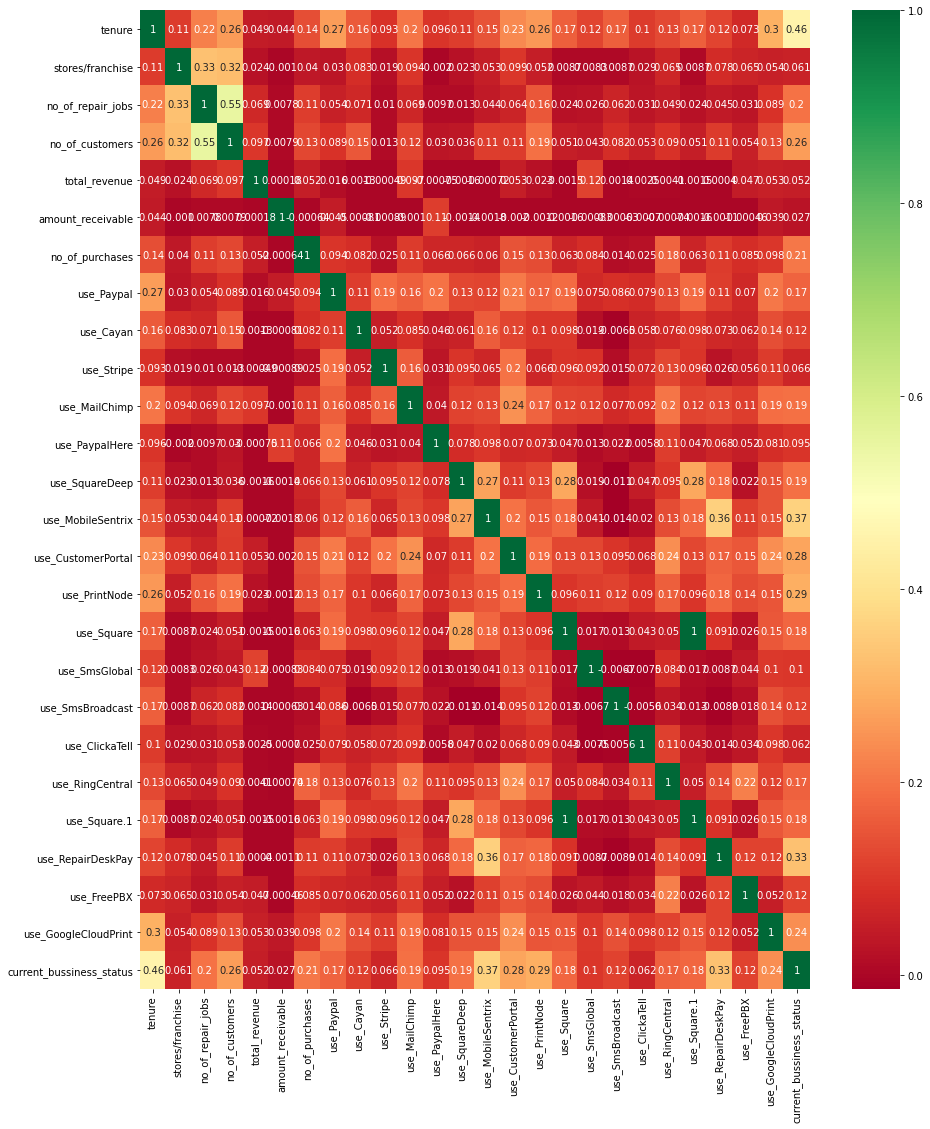

In [112]:
# Showing relation with heat map
plt.figure(figsize=(15,18))

# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
sns.heatmap(df_corr, annot=True,cmap="RdYlGn")
# plt.xticks(rotation=45) 
plt.show()

**Statistical Analysis of data**

In [71]:
# Statistical Analysis of data
df.describe()

,tenure,stores/franchise,no_of_repair_jobs,no_of_customers,total_revenue,amount_receivable,no_of_purchases,current_bussiness_status
count,12780.000000,12780.000000,12780.000000,12780.000000,1.278000e+04,1.278000e+04,12780.000000,12780.000000
mean,0.261502,1.182473,684.344992,561.829656,3.976964e+05,6.809945e+09,3.289671,0.096322
std,0.748531,1.572229,8944.355691,4634.924159,2.254986e+07,7.698118e+11,45.724006,0.295044
min,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
75%,0.000000,1.000000,3.000000,2.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
max,5.000000,100.000000,649631.000000,370181.000000,2.433955e+09,8.702619e+13,2765.000000,1.000000


**Detecting oliers using Inqertile range **

In [72]:
#Detecting oliers using Inqertile range 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
outliers = ((df< (Q1 - 1.5 * IQR))| (df> (Q3 + 1.5 * IQR))).any(axis=1)
outliers

tenure                      0.0
stores/franchise            0.0
no_of_repair_jobs           3.0
no_of_customers             2.0
total_revenue               0.0
amount_receivable           0.0
no_of_purchases             0.0
use_Paypal                  0.0
use_Cayan                   0.0
use_Stripe                  0.0
use_MailChimp               0.0
use_PaypalHere              0.0
use_SquareDeep              0.0
use_MobileSentrix           0.0
use_CustomerPortal          0.0
use_PrintNode               0.0
use_Square                  0.0
use_SmsGlobal               0.0
use_SmsBroadcast            0.0
use_ClickaTell              0.0
use_RingCentral             0.0
use_Square.1                0.0
use_RepairDeskPay           0.0
use_FreePBX                 0.0
use_GoogleCloudPrint        0.0
current_bussiness_status    0.0
dtype: float64


0         True
1         True
2         True
3         True
4         True
         ...  
13191    False
13192    False
13193    False
13194    False
13195    False
Length: 12780, dtype: bool

**Deleting outliers**

In [73]:
#Deleting outliers
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

(8762, 31)

**Detecting outliers using z score **

In [74]:
# Detecting outliers using z score 

z = np.abs(stats.zscore(df[['tenure', 'stores/franchise', 'no_of_repair_jobs', 'no_of_customers',
       'total_revenue', 'amount_receivable', 'no_of_purchases']]))
print(z)

[[6.33064254e+00 2.42819335e+00 1.02129845e-02 ... 1.26788033e-02
  8.84653588e-03 7.19490786e-02]
 [3.49367670e-01 1.16064338e-01 7.61789528e-02 ... 1.76282126e-02
  8.84659252e-03 7.19490786e-02]
 [6.33064254e+00 5.60851547e+00 1.31199594e-02 ... 6.21564014e-03
  8.84643483e-03 7.19490786e-02]
 ...
 [3.49367670e-01 1.16064338e-01 7.65143730e-02 ... 1.76370019e-02
  8.84659263e-03 7.19490786e-02]
 [3.49367670e-01 1.16064338e-01 7.65143730e-02 ... 1.76370019e-02
  8.84659263e-03 7.19490786e-02]
 [3.49367670e-01 1.16064338e-01 7.65143730e-02 ... 1.76370019e-02
  8.84659263e-03 7.19490786e-02]]


**Deleting Otliers**

In [75]:
# Deleting Otliers
df_o = df[(z < 3).all(axis=1)]
df_o.shape

(12192, 31)

**Replacing values in DataFrame and Checking data in current_bussiness_status **

---



In [76]:
df.replace({False: 0, True: 1}, inplace=True)
df['current_bussiness_status'].value_counts()

0    11549
1     1231
Name: current_bussiness_status, dtype: int64

**Dividing Data into feature matrix and Target column**

Impplementing Logistic Regression

In [77]:
y = df.current_bussiness_status
X = df[['tenure', 'stores/franchise', 'no_of_repair_jobs', 'no_of_customers',
       'total_revenue', 'amount_receivable', 'no_of_purchases', 'use_Paypal',
       'use_Cayan', 'use_Stripe', 'use_MailChimp', 'use_PaypalHere',
       'use_SquareDeep', 'use_MobileSentrix', 'use_CustomerPortal',
       'use_PrintNode', 'use_Square', 'use_SmsGlobal', 'use_SmsBroadcast',
       'use_ClickaTell', 'use_RingCentral', 'use_Square.1']]
 
# Train model
clf_0 = LogisticRegression().fit(X, y)
 
# Predict on training set
pred_y_0 = clf_0.predict(X)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Checking Accuracy Rate

In [78]:
# How's the accuracy?
print( accuracy_score(pred_y_0, y) )
print( np.unique( pred_y_0 ) )

0.9036776212832551
[0]


In [79]:
from sklearn.utils import resample

**Separate majority and minority classes**

In [80]:
# Separate majority and minority classes
df_majority = df[df.current_bussiness_status==0]
df_minority = df[df.current_bussiness_status==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=11549,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.current_bussiness_status.value_counts()

1    11549
0    11549
Name: current_bussiness_status, dtype: int64

**Creating Up Sample data and implementing Logistic Regression**

In [81]:
y_ups = df_upsampled.current_bussiness_status
X_ups = df_upsampled[['tenure', 'stores/franchise', 'no_of_repair_jobs', 'no_of_customers',
       'total_revenue', 'amount_receivable', 'no_of_purchases', 'use_Paypal',
       'use_Cayan', 'use_Stripe', 'use_MailChimp', 'use_PaypalHere',
       'use_SquareDeep', 'use_MobileSentrix', 'use_CustomerPortal',
       'use_PrintNode', 'use_Square', 'use_SmsGlobal', 'use_SmsBroadcast',
       'use_ClickaTell', 'use_RingCentral', 'use_Square.1']]
 
# Train model
clf_1 = LogisticRegression().fit(X_ups, y_ups)
 
# Predict on training set
pred_y_1 = clf_1.predict(X_ups)
 
# Is our model still predicting just one class?
print(np.unique( pred_y_1 ) ) 
# How's our accuracy?
print( accuracy_score(y_ups, pred_y_1) )

[0]
0.5


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Creating downsample and implementing Logistic Regression**

In [82]:
# Separate majority and minority classes
df_majority = df[df.current_bussiness_status==0]
df_minority = df[df.current_bussiness_status==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=1231,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.current_bussiness_status.value_counts()

1    1231
0    1231
Name: current_bussiness_status, dtype: int64

In [83]:
y_dps = df_downsampled.current_bussiness_status
X_dps = df_downsampled[['tenure', 'stores/franchise', 'no_of_repair_jobs', 'no_of_customers',
       'total_revenue', 'amount_receivable', 'no_of_purchases', 'use_Paypal',
       'use_Cayan', 'use_Stripe', 'use_MailChimp', 'use_PaypalHere',
       'use_SquareDeep', 'use_MobileSentrix', 'use_CustomerPortal',
       'use_PrintNode', 'use_Square', 'use_SmsGlobal', 'use_SmsBroadcast',
       'use_ClickaTell', 'use_RingCentral', 'use_Square.1']]
# Train model
clf_2 = LogisticRegression().fit(X_dps, y_dps)
 
# Predict on training set
pred_y_2 = clf_2.predict(X_dps)
 
# Is our model still predicting just one class?
print(np.unique( pred_y_2 ) )
 
# How's our accuracy?
print( accuracy_score(y_dps, pred_y_2) )

[0]
0.5


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Implementing Extra Tree Classifier on Simple data **

[0.11245237 0.01891045 0.12162432 0.11131703 0.14470228 0.14410741
 0.07114092 0.01103264 0.00605338 0.00448593 0.01411053 0.00497436
 0.01751295 0.09110481 0.03863798 0.04750043 0.00912013 0.00397547
 0.00553541 0.00488885 0.00833699 0.00847537]


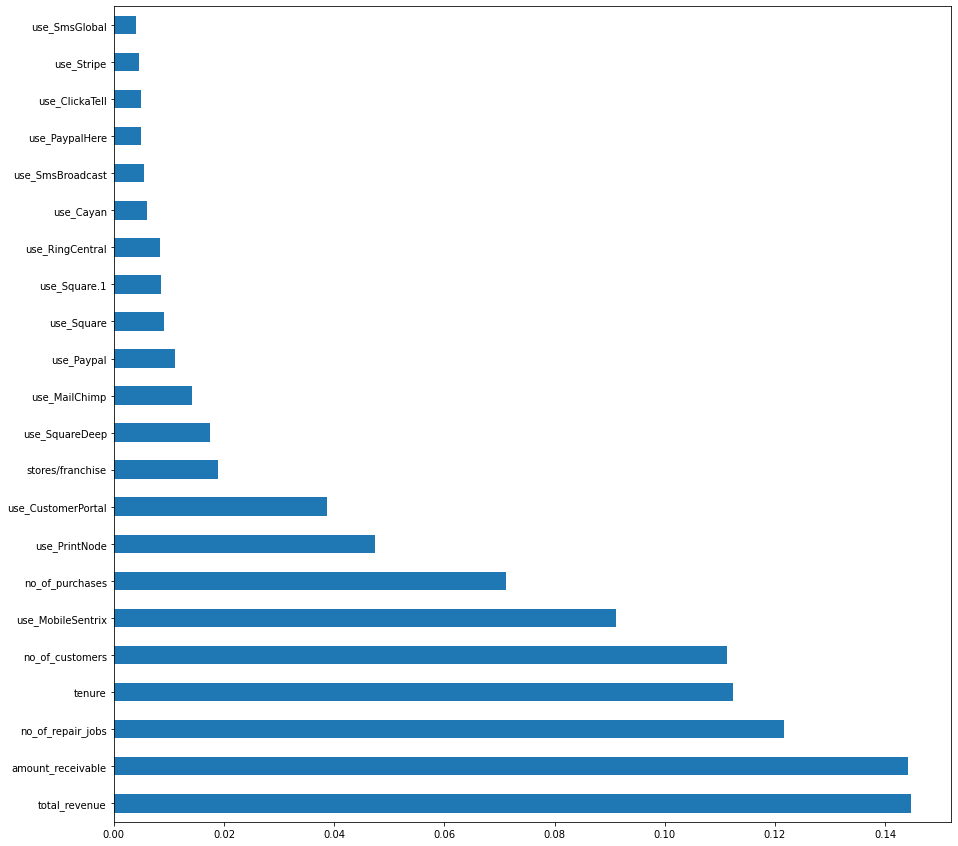

In [84]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
plt.figure(figsize=(15,15))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(27).plot(kind='barh')
plt.show()

**Implementing Extra Tree Classifier on  Uper Sample Data**

[0.18689188 0.01306934 0.08336449 0.1213266  0.12434808 0.11355267
 0.06155822 0.01631601 0.00517778 0.00343668 0.01077334 0.00413609
 0.02139243 0.09686008 0.05427518 0.04038368 0.01056845 0.00393984
 0.00523806 0.00295131 0.00533434 0.01510543]


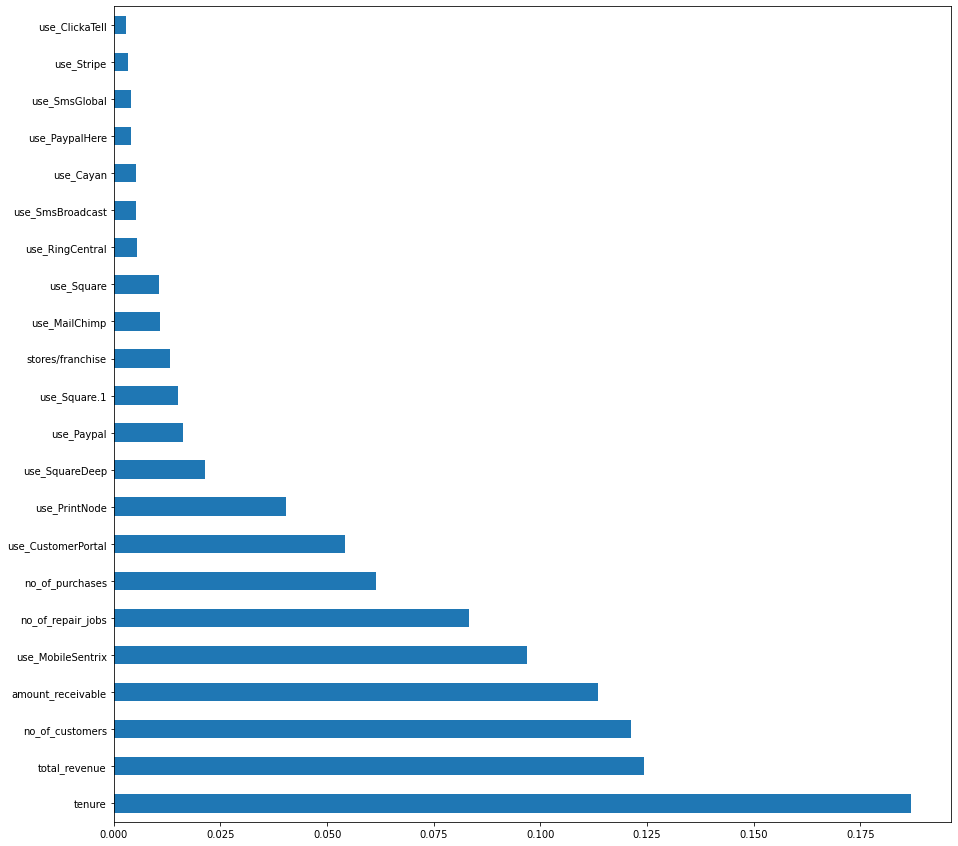

In [85]:
model = ExtraTreesClassifier()
model.fit(X_ups,y_ups)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
plt.figure(figsize=(15,15))
feat_importances = pd.Series(model.feature_importances_, index=X_ups.columns)
feat_importances.nlargest(27).plot(kind='barh')
plt.show()


Implementing Extra Tree Classifier on Down Sample Data

[0.1787187  0.01515378 0.1268595  0.1052327  0.09959307 0.10851264
 0.0534541  0.01888894 0.00549791 0.00433799 0.01351942 0.00349837
 0.01723963 0.09956425 0.06070548 0.04289946 0.01319748 0.00385761
 0.0048158  0.0054067  0.00321183 0.01583463]


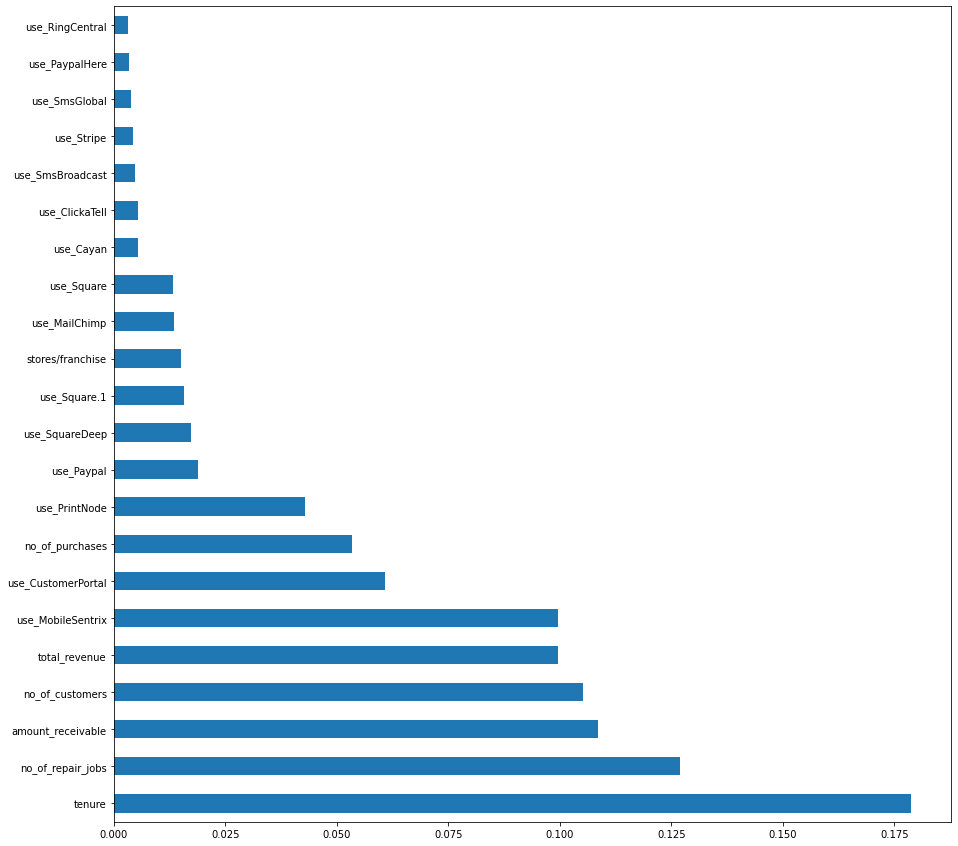

In [86]:
model = ExtraTreesClassifier()
model.fit(X_dps,y_dps)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
plt.figure(figsize=(15,15))
feat_importances = pd.Series(model.feature_importances_, index=X_dps.columns)
feat_importances.nlargest(27).plot(kind='barh')
plt.show()

**Implementing Adaoost Classifier and checking Accuracy Rate** 

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
from sklearn.multiclass import OneVsRestClassifier

In [110]:
dtc = DecisionTreeClassifier(criterion='entropy')
gnb = GaussianNB()
lr = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=5)
estimators=[]
estimators.append(('logistic',lr))
estimators.append(('NB',gnb))
estimators.append(('DT',dtc))
estimators.append(('KNN',knn))
adc = AdaBoostClassifier(n_estimators=50, learning_rate=1,base_estimator=dtc)
ad = adc.fit(X_train,y_train)
ypredict = ad.predict(X_test)

In [111]:
metrics.accuracy_score(y_test,ypredict)

0.9774891774891775